In [1]:
# BUAN6341 - Machine Learning 
### Stroke Prediction 
### project 4  |  Xin Yao

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
sns.set(rc={'figure.figsize':(9,6)}, font_scale=1.5)
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

## Part 1: Basic dataset information 

In [3]:
# read the data 
data= pd.read_csv("stroke.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# this dataset has 5110 rows and 12 colums 
data.shape

(5110, 12)

In [5]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
#showing the first few roles of the data 
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# showing the bottom few roles of the data 
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [8]:
#checking the statistics of the data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
min(data.age)

0.08

In [10]:
#calculate the missing rates for each column
missing_rate = round(data.isnull().mean()*100,4)
missing_rate

id                   0.0000
gender               0.0000
age                  0.0000
hypertension         0.0000
heart_disease        0.0000
ever_married         0.0000
work_type            0.0000
Residence_type       0.0000
avg_glucose_level    0.0000
bmi                  3.9335
smoking_status       0.0000
stroke               0.0000
dtype: float64

In [11]:
# checking for duplicate values 
duplicate_rows = data.duplicated()
print("Number of duplicated records :",len(data[duplicate_rows]))

Number of duplicated records : 0


## Part 2: Data Cleaning and Visualization

In [12]:
# gender distribution 
genderdis = [data.gender]
gender = data['gender'].value_counts()
print(gender)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [13]:
# cleaning the data that has an alternative input than the others
rows_to_delete_g = data[data['gender'] == 'Other']
data = data.drop(rows_to_delete_g.index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [14]:
#deleting null values 
rows_to_delete = data[data['bmi'].isnull()]
data = data.drop(rows_to_delete.index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.5+ KB


In [15]:
missing_rate = round(data.isnull().mean()*100,4)
missing_rate

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [16]:
# checking gender distribution again
gender = [data.gender]
gender = data['gender'].value_counts()
print(gender)

Female    2897
Male      2011
Name: gender, dtype: int64


In [17]:
#Hypertension report
hypertension = [data.hypertension]
hypertension = data['hypertension'].value_counts()
print(hypertension)

0    4457
1     451
Name: hypertension, dtype: int64


In [18]:
# heart disease report
heart = [data.heart_disease]
heart_disease = data['heart_disease'].value_counts()
print(heart_disease)

0    4665
1     243
Name: heart_disease, dtype: int64


In [19]:
# resident type distribution
restype = [data.Residence_type]
living = data['Residence_type'].value_counts()
print(living)

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64


In [20]:
# smoking status 
smoking = [data.smoking_status]
smoking = data['smoking_status'].value_counts()
print(smoking)

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64


In [21]:
# work type distribution
work = [data.work_type]
work = data['work_type'].value_counts()
print(work)

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


In [22]:
# marriage status
marriage = [data.ever_married]
marriage = data['ever_married'].value_counts()
print(marriage)

Yes    3204
No     1704
Name: ever_married, dtype: int64


In [23]:
# changing the string type into integers
data["ever_married"] = data["ever_married"].replace({"Yes":"1", "No":"0"})

/var/folders/07/hqk0y6q106l9s9knr4cc58lh0000gn/T/ipykernel_25188/2762622251.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

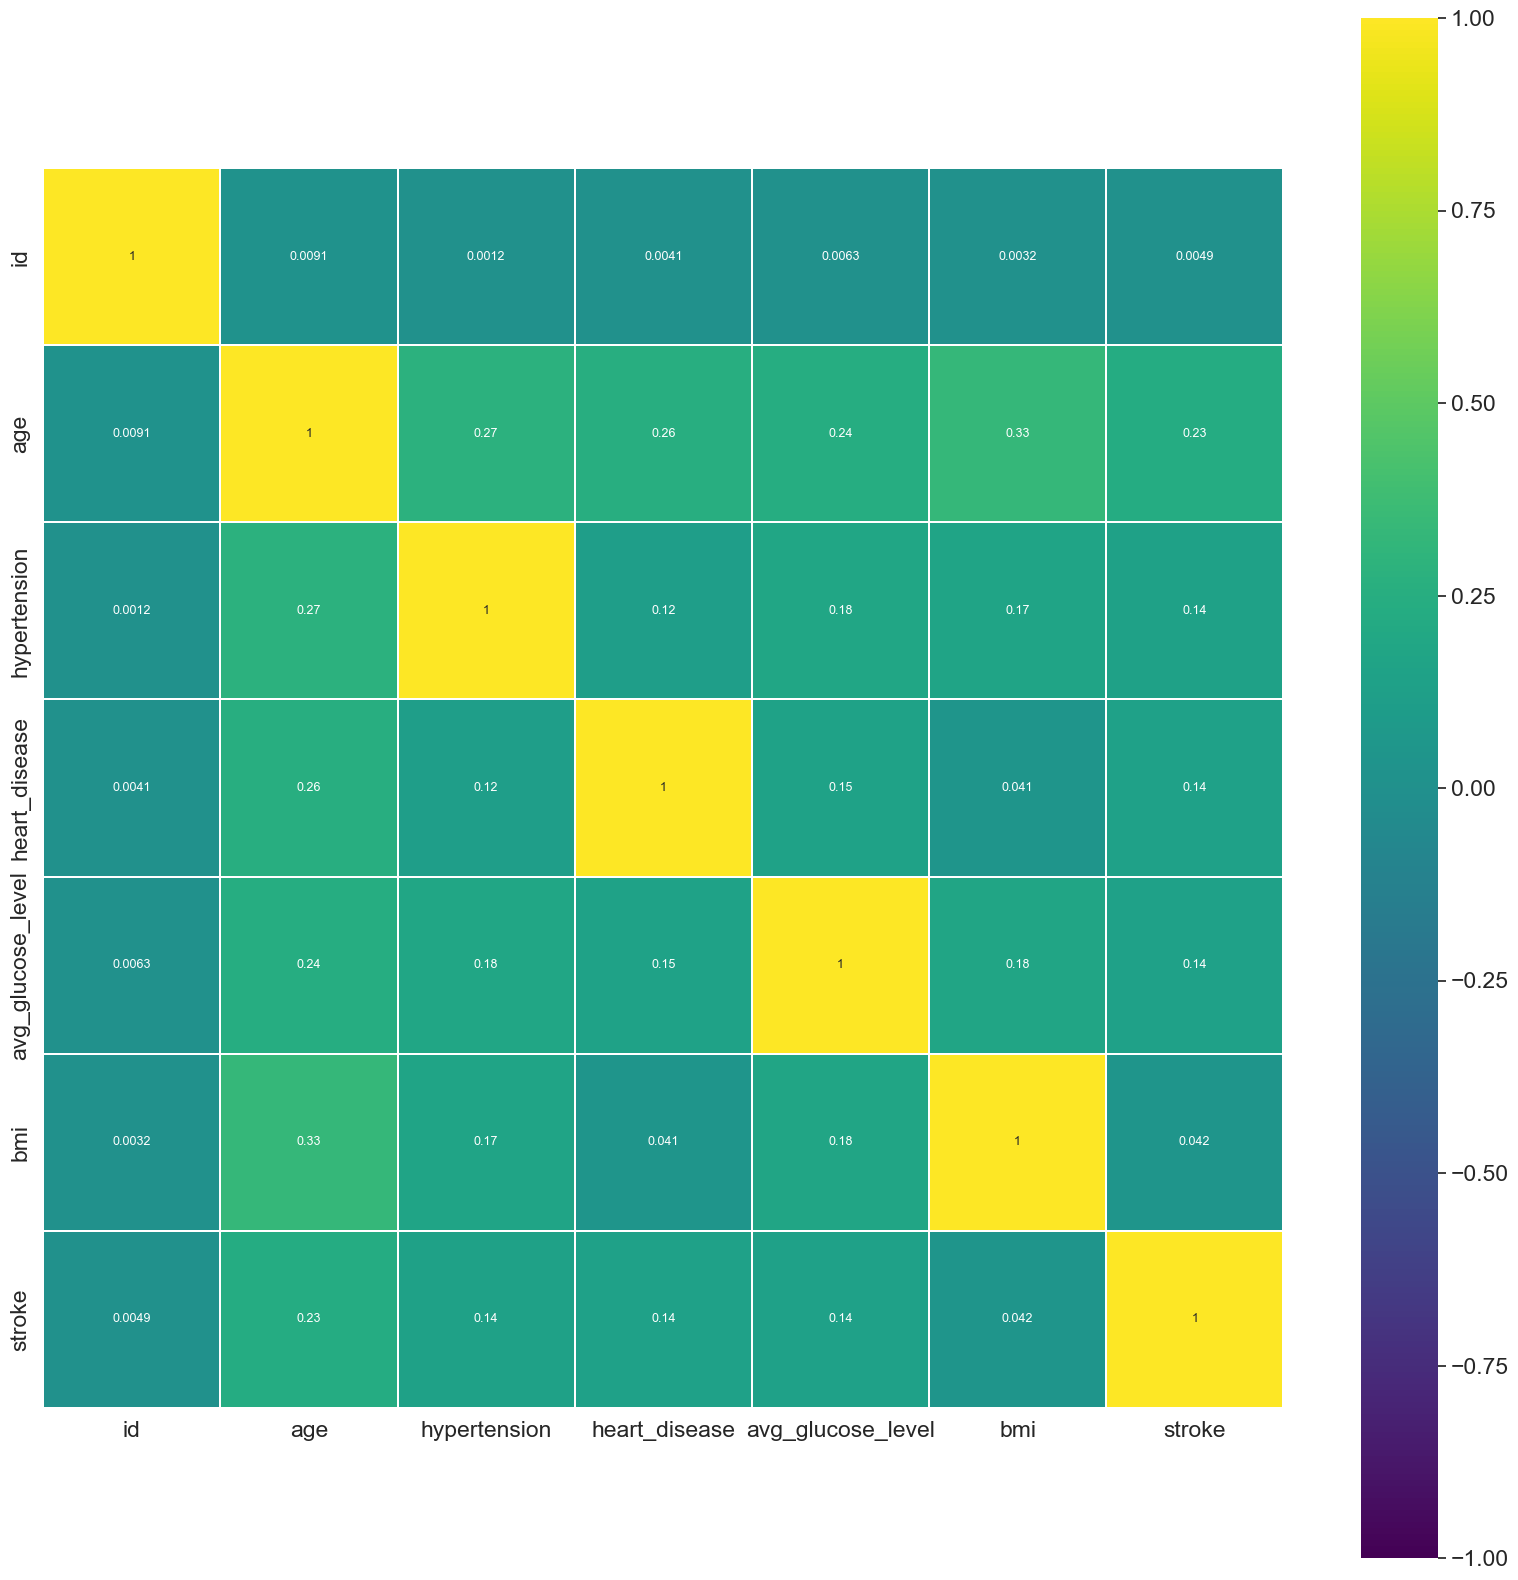

In [24]:
# generating a heatmap to see their correlations with each other
corr = data.corr() 
plt.figure(figsize=(20, 20))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9}, square=True)

/var/folders/07/hqk0y6q106l9s9knr4cc58lh0000gn/T/ipykernel_25188/316801559.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

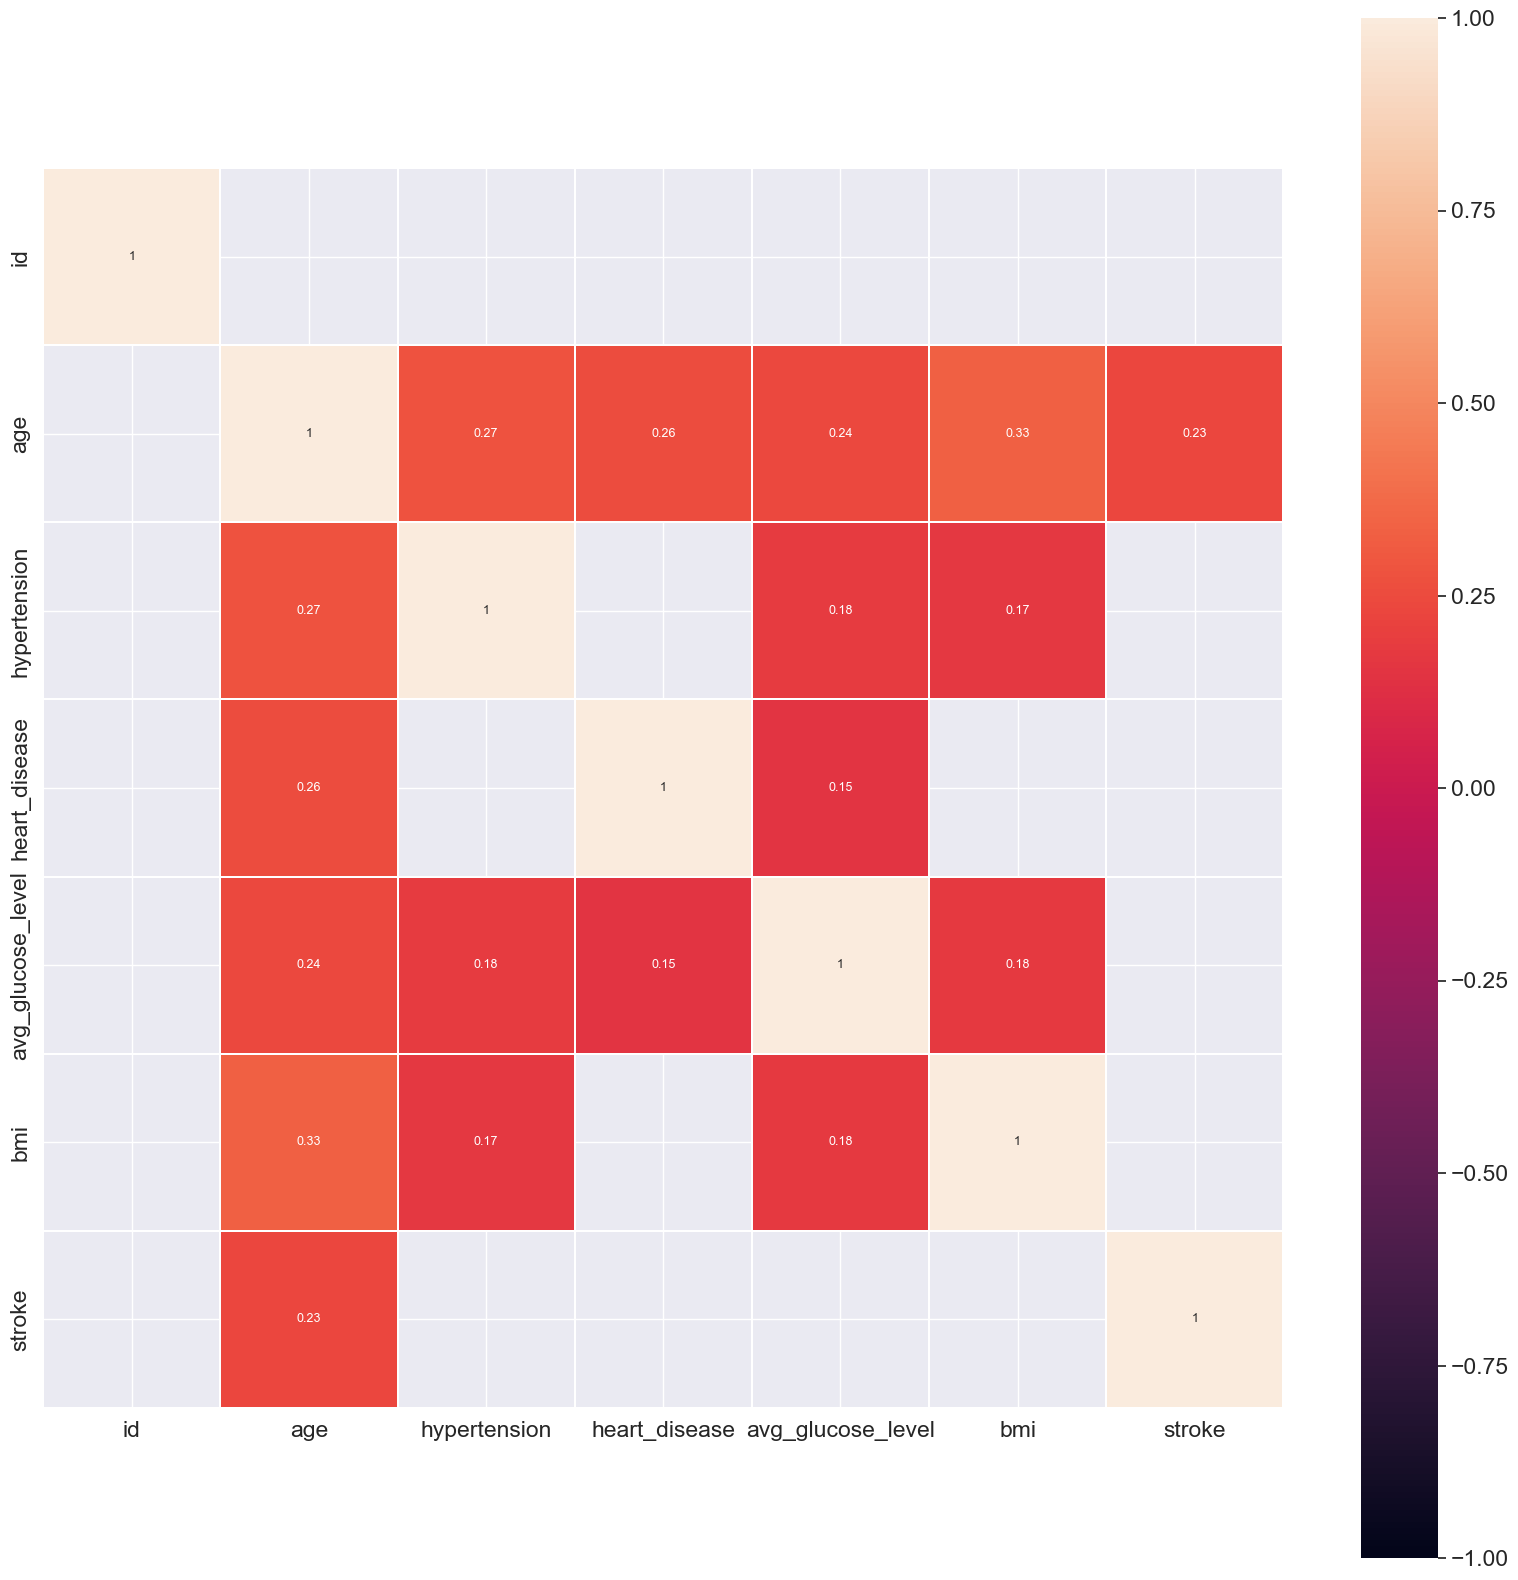

In [25]:
# only showing the correlations larger than 0.15
corr = data.corr() 
plt.figure(figsize=(20, 20))

sns.heatmap(corr[(corr >= 0.15) ], 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9}, square=True)

/var/folders/07/hqk0y6q106l9s9knr4cc58lh0000gn/T/ipykernel_25188/378465476.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

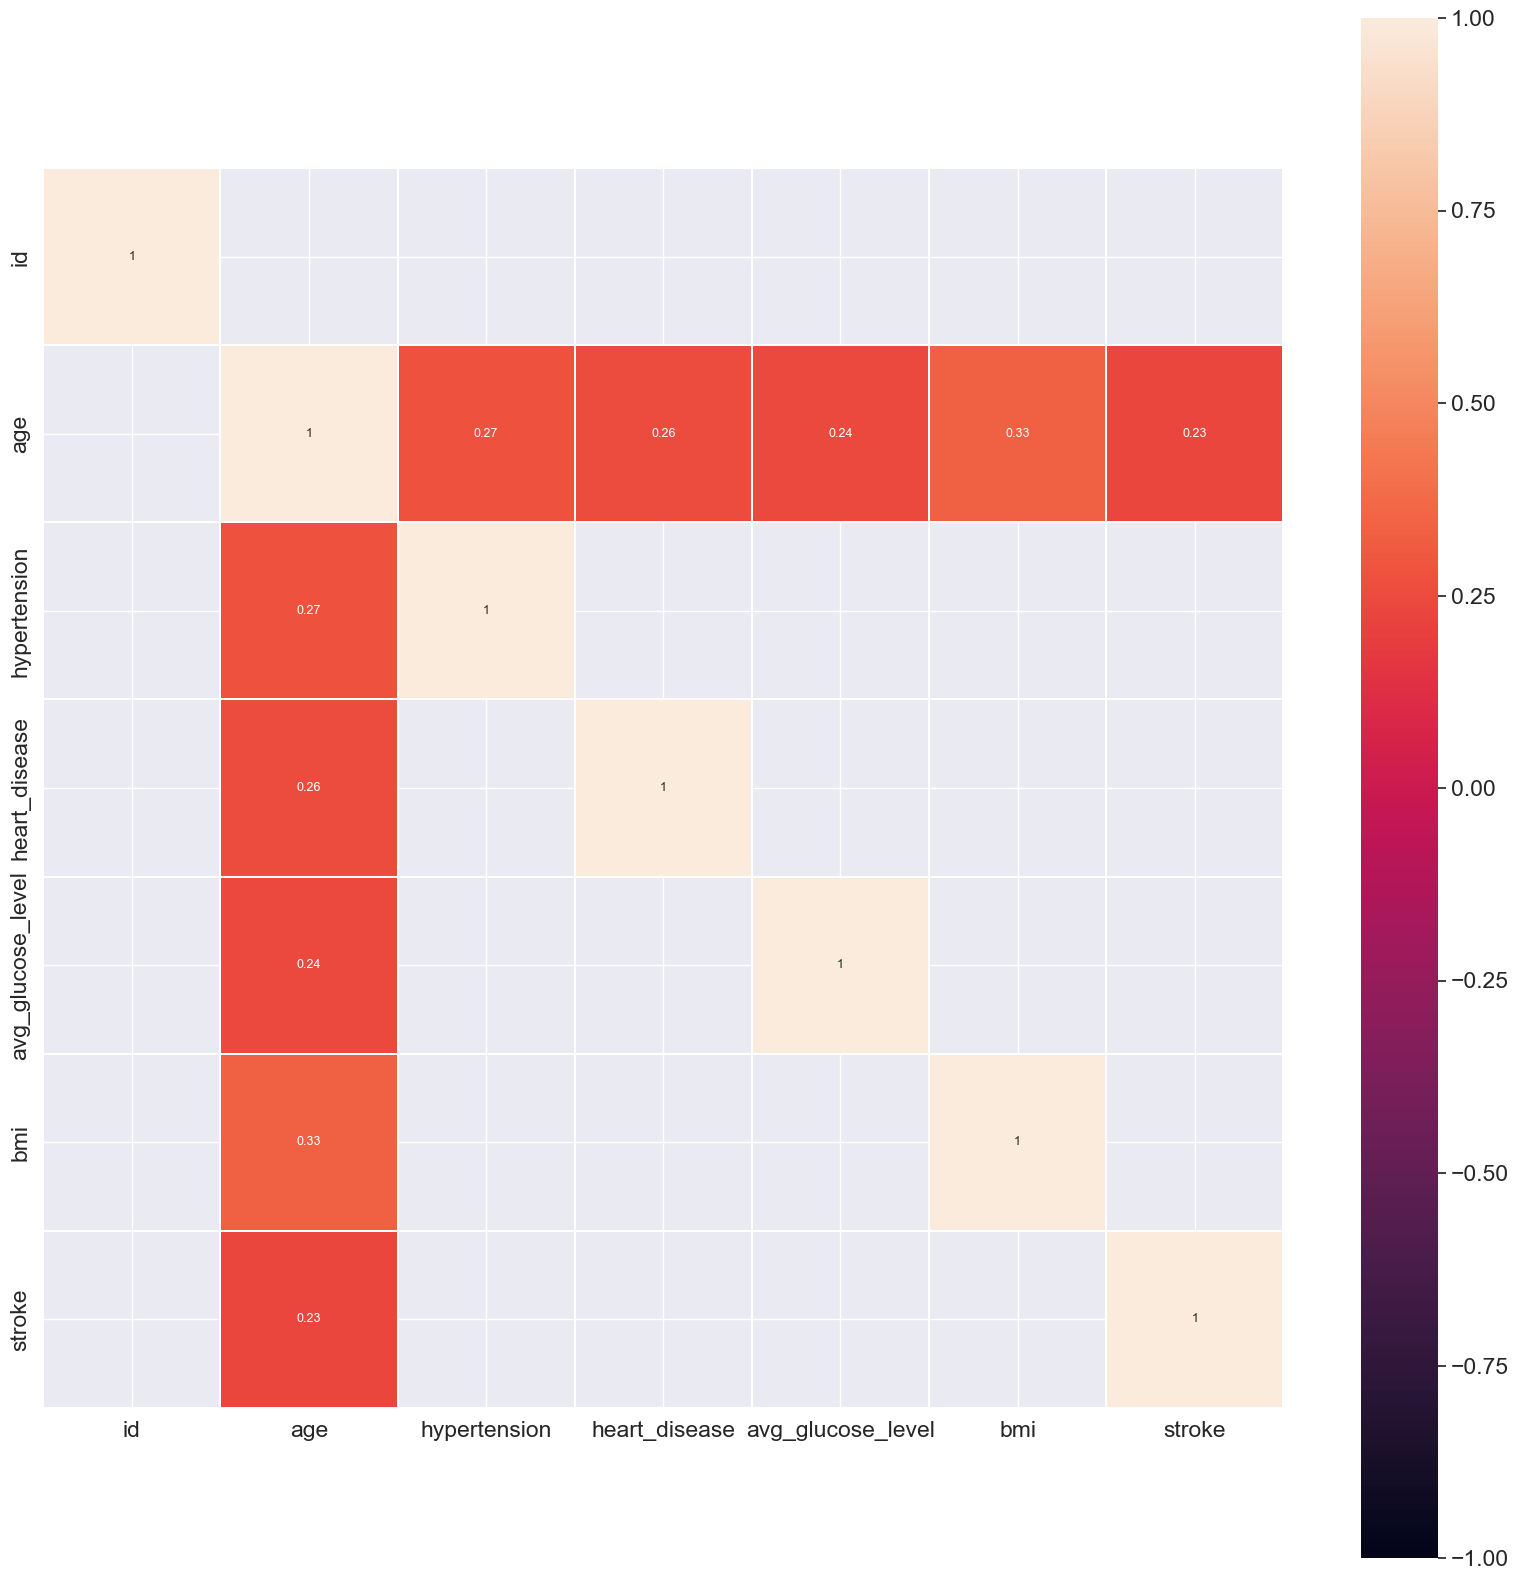

In [26]:
# only showing the correlations larger than 0.20
corr = data.corr() 
plt.figure(figsize=(20, 20))

sns.heatmap(corr[(corr >= 0.20) ], 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9}, square=True)

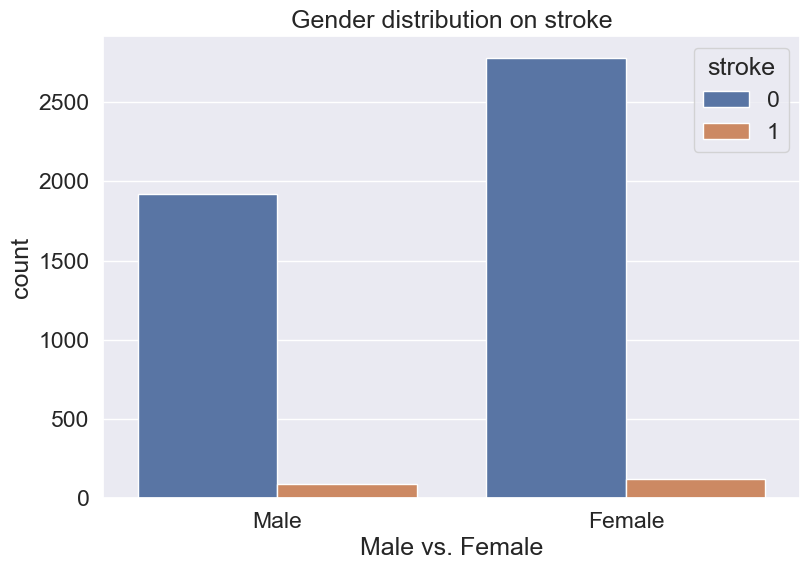

In [27]:
# overall distribution on gender of the data on wthether they had a stoke or not
plt.figure(figsize=(9, 6))
sns.countplot(x='gender', hue='stroke', data=data)
plt.title('Gender distribution on stroke')
plt.xlabel("Male vs. Female")
plt.xticks(rotation=0)
plt.show()

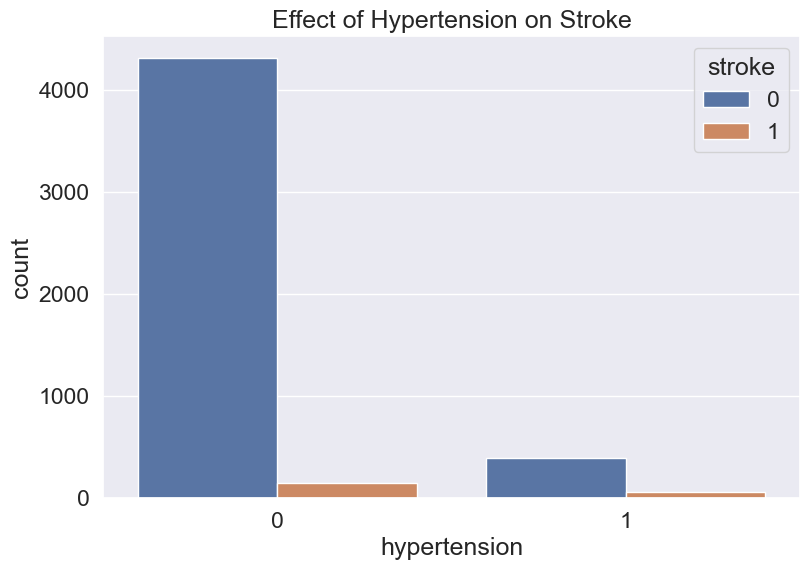

In [28]:
# overall distribution of hypertension on wthether they had a stoke or not
plt.figure(figsize=(9, 6))
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.title('Effect of Hypertension on Stroke')
plt.xticks(rotation=0)
plt.show()

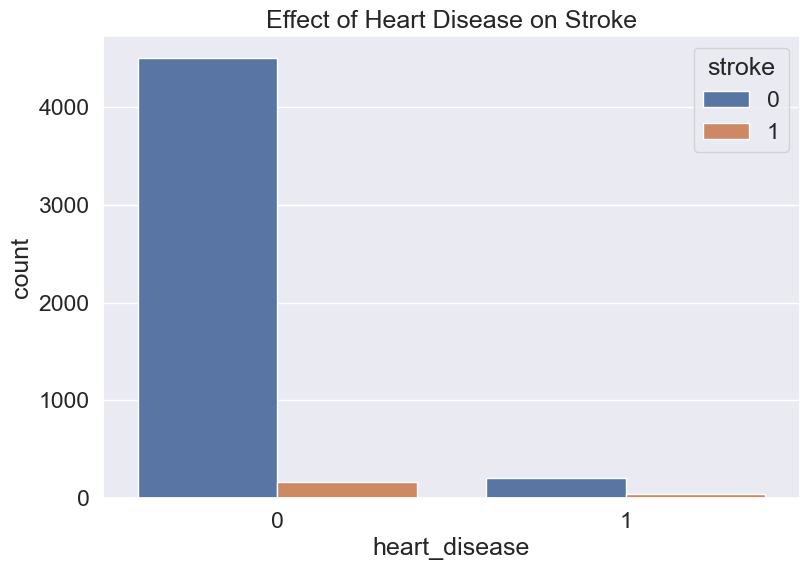

In [29]:
# overall distribution of heart disease on wthether they had a stoke or not
plt.figure(figsize=(9, 6))
sns.countplot(x='heart_disease', hue='stroke', data=data)
plt.title('Effect of Heart Disease on Stroke')
plt.xticks(rotation=0)
plt.show()

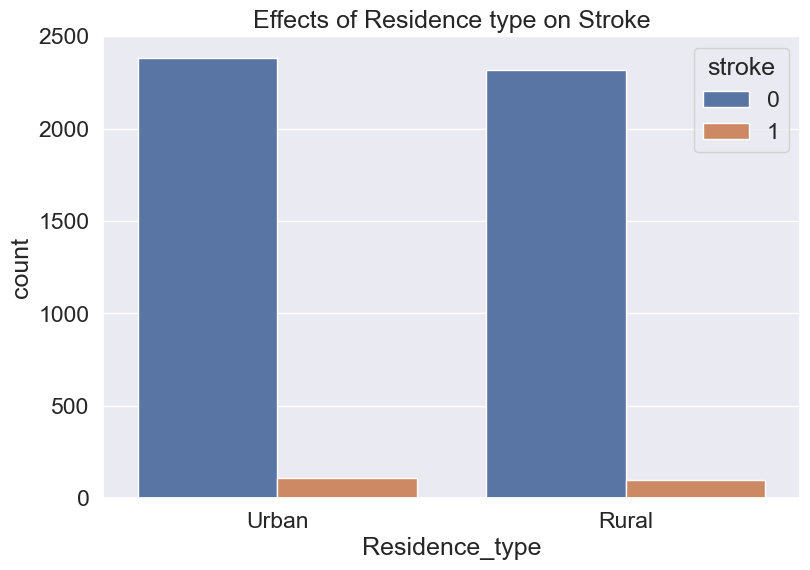

In [30]:
# overall distribution of their residence type on wthether they had a stoke or not
plt.figure(figsize=(9, 6))
sns.countplot(x='Residence_type', hue='stroke', data=data)
plt.title('Effects of Residence type on Stroke')
plt.xticks(rotation=0)
plt.show()

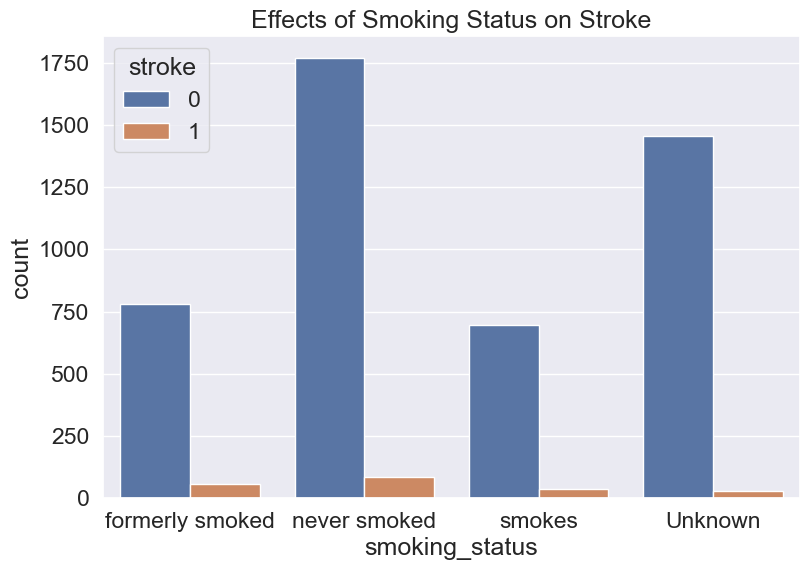

In [31]:
# overall distribution of their smoking status on wthether they had a stoke or not
plt.figure(figsize=(9, 6))
sns.countplot(x='smoking_status', hue='stroke', data=data)
plt.title('Effects of Smoking Status on Stroke')
plt.xticks(rotation=0)
plt.show()

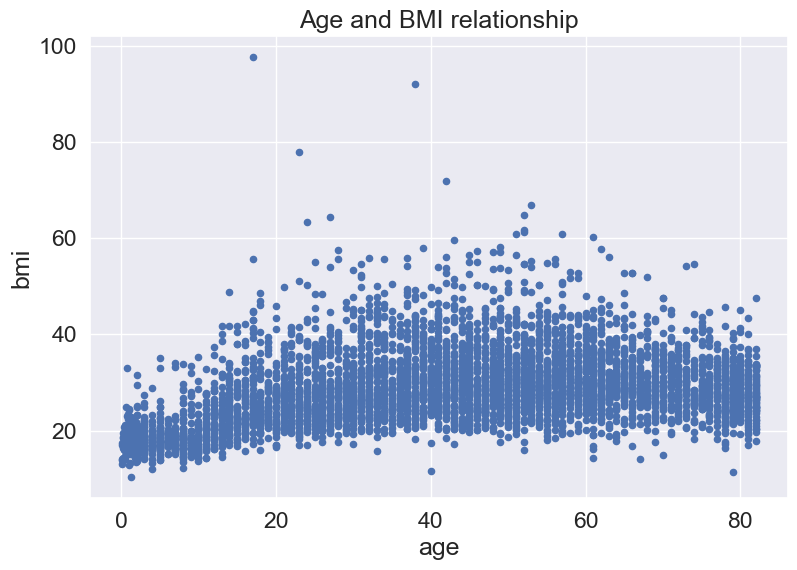

In [32]:
# using a scatter plot to check to see if there are any recognizable trend 
data.plot(kind='scatter', x='age', y='bmi', title='Age and BMI relationship');

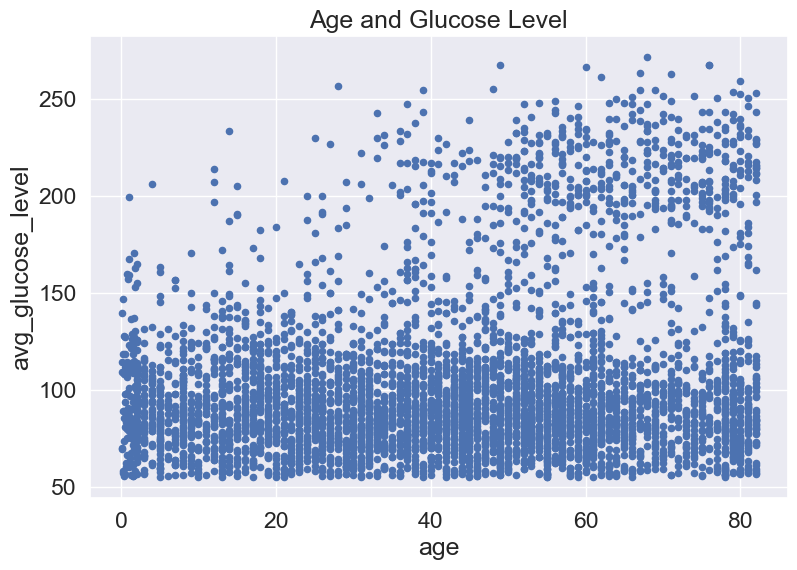

In [33]:
data.plot(kind='scatter', x='age', y='avg_glucose_level', title='Age and Glucose Level');

# Part 3 : Data Processing

In [34]:
#number of people who had a stroke
stroke= data[data["stroke"] == 1]
print(stroke.count())

id                   209
gender               209
age                  209
hypertension         209
heart_disease        209
ever_married         209
work_type            209
Residence_type       209
avg_glucose_level    209
bmi                  209
smoking_status       209
stroke               209
dtype: int64


In [35]:
#number of people who never had a stroke
no_stroke= data[data["stroke"] == 0]
print(no_stroke.count())

id                   4699
gender               4699
age                  4699
hypertension         4699
heart_disease        4699
ever_married         4699
work_type            4699
Residence_type       4699
avg_glucose_level    4699
bmi                  4699
smoking_status       4699
stroke               4699
dtype: int64


In [36]:
#gender distribution on the people who had a stroke
male = data[(data["gender"] == "Male") & (data["stroke"] == 1)]
print("Number of male who had a stroke", male.count())
female = data[(data["gender"] == "Female") & (data["stroke"] == 1)]
print("Number of male who had a stroke", female.count())

Number of male who had a stroke id                   89
gender               89
age                  89
hypertension         89
heart_disease        89
ever_married         89
work_type            89
Residence_type       89
avg_glucose_level    89
bmi                  89
smoking_status       89
stroke               89
dtype: int64
Number of male who had a stroke id                   120
gender               120
age                  120
hypertension         120
heart_disease        120
ever_married         120
work_type            120
Residence_type       120
avg_glucose_level    120
bmi                  120
smoking_status       120
stroke               120
dtype: int64


In [37]:
#age distribution on the people who had a stroke
age1 = data[(data["age"]<=20) & (data["stroke"] == 1)]
print("Number of people who had a stroke younger than 20:",age1.count())

age2 = data[(data["age"]>20) & (data["age"]<=40) & (data["stroke"] == 1)]
print("Number of people who had a stroke between ages 20 and 40:",age2.count())

age3 = data[(data["age"]>40) & (data["age"]<=60) & (data["stroke"] == 1)]
print("Number of people who had a stroke between ages 40 and 60:",age3.count())

age4 = data[(data["age"]>60) & (data["age"]<=80) & (data["stroke"] == 1)]
print("Number of people who had a stroke between ages 60 and 80:",age4.count())

age5 = data[(data["age"]>80) & (data["stroke"] == 1)]
print("Number of people who had a stroke older than 80:",age5.count())

Number of people who had a stroke younger than 20: id                   1
gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
dtype: int64
Number of people who had a stroke between ages 20 and 40: id                   5
gender               5
age                  5
hypertension         5
heart_disease        5
ever_married         5
work_type            5
Residence_type       5
avg_glucose_level    5
bmi                  5
smoking_status       5
stroke               5
dtype: int64
Number of people who had a stroke between ages 40 and 60: id                   57
gender               57
age                  57
hypertension         57
heart_disease        57
ever_married         57
work_type            57
Residence_type       57
avg_glucose_level    57
bmi                  57
smoking_status 

In [38]:
#BMI distribution on the people who had a stroke
bmi1 = data[(data["bmi"]<=18.4) & (data["stroke"] == 1)]
print("Number of people who had a stroke with a low BMI:",bmi1.count())

bmi2 = data[(data["bmi"]>18.4) & (data["bmi"]<=24.5) & (data["stroke"] == 1)]
print("Number of people who had a stroke with a healthy BMI:",bmi2.count())
    
bmi3= data[(data["bmi"]>24.5) & (data["stroke"] == 1)]
print("Number of people who had a stroke with a high BMI:",bmi3.count())

bmi4= data[(data["bmi"]=="N/A") & (data["stroke"] == 1)]
print("Number of people who has no BMI record but had a stroke:",bmi4.count())


Number of people who had a stroke with a low BMI: id                   1
gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
dtype: int64
Number of people who had a stroke with a healthy BMI: id                   34
gender               34
age                  34
hypertension         34
heart_disease        34
ever_married         34
work_type            34
Residence_type       34
avg_glucose_level    34
bmi                  34
smoking_status       34
stroke               34
dtype: int64
Number of people who had a stroke with a high BMI: id                   174
gender               174
age                  174
hypertension         174
heart_disease        174
ever_married         174
work_type            174
Residence_type       174
avg_glucose_level    174
bmi                  174
smoki

In [39]:
#glucose level distribution on the people who had a stroke
glucose1 = data[(data["avg_glucose_level"]<=69) & (data["stroke"] == 1)]
print("Number of people who had a stroke with a low glucose level:",glucose1.count())

glucose2 = data[(data["avg_glucose_level"]>69) & (data["avg_glucose_level"]<=100) & (data["stroke"] == 1)]
print("Number of people who had a stroke with a healthy glucose level:",glucose2.count())
     
glucose3= data[(data["avg_glucose_level"]>100) & (data["stroke"] == 1)]
print("Number of people who had a stroke with a high glucoselevel:",glucose3.count())

Number of people who had a stroke with a low glucose level: id                   20
gender               20
age                  20
hypertension         20
heart_disease        20
ever_married         20
work_type            20
Residence_type       20
avg_glucose_level    20
bmi                  20
smoking_status       20
stroke               20
dtype: int64
Number of people who had a stroke with a healthy glucose level: id                   73
gender               73
age                  73
hypertension         73
heart_disease        73
ever_married         73
work_type            73
Residence_type       73
avg_glucose_level    73
bmi                  73
smoking_status       73
stroke               73
dtype: int64
Number of people who had a stroke with a high glucoselevel: id                   116
gender               116
age                  116
hypertension         116
heart_disease        116
ever_married         116
work_type            116
Residence_type       116
avg_glucose_le

In [40]:
#Hypertension distribution on the people who had a stroke
hyper1 = data[(data["hypertension"] == 1) & (data["stroke"] == 1)]
print("Number of people who had a stroke also had a hyoertension:",hyper1.count())

hyper2 = data[(data["hypertension"] == 0) & (data["stroke"] == 1)]
print("Number of people who had a stroke never had a hyoertension:",hyper2.count())

Number of people who had a stroke also had a hyoertension: id                   60
gender               60
age                  60
hypertension         60
heart_disease        60
ever_married         60
work_type            60
Residence_type       60
avg_glucose_level    60
bmi                  60
smoking_status       60
stroke               60
dtype: int64
Number of people who had a stroke never had a hyoertension: id                   149
gender               149
age                  149
hypertension         149
heart_disease        149
ever_married         149
work_type            149
Residence_type       149
avg_glucose_level    149
bmi                  149
smoking_status       149
stroke               149
dtype: int64


In [41]:
#heart disease distribution on the people who had a stroke
heart1 = data[(data["heart_disease"] == 1) & (data["stroke"] == 1)]
print("Number of people who had a stroke also had a heart disease:",heart1.count())

heart1 = data[(data["heart_disease"] == 0) & (data["stroke"] == 1)]
print("Number of people who had a stroke also had a heart disease:",heart1.count())

Number of people who had a stroke also had a heart disease: id                   40
gender               40
age                  40
hypertension         40
heart_disease        40
ever_married         40
work_type            40
Residence_type       40
avg_glucose_level    40
bmi                  40
smoking_status       40
stroke               40
dtype: int64
Number of people who had a stroke also had a heart disease: id                   169
gender               169
age                  169
hypertension         169
heart_disease        169
ever_married         169
work_type            169
Residence_type       169
avg_glucose_level    169
bmi                  169
smoking_status       169
stroke               169
dtype: int64


# Spliting the data into training and testing dataset

In [42]:
from sklearn.model_selection import train_test_split

# Features and target variable
features = ['age','heart_disease','avg_glucose_level', 'bmi']
target = ['stroke']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Show the size of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3926, 4), (982, 4), (3926, 1), (982, 1))

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Retrieve the coefficients for each feature variable
coefficients = model.coef_[0]


mse, rmse, r2

(0.047360677956174387, 0.21762508576948197, 0.07242442859211717)

In [44]:
# Create a DataFrame to display the coefficients
coeff_df = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])
coeff_df


,Coefficient
age,0.001736
heart_disease,0.053297
avg_glucose_level,0.000451
bmi,-0.001127


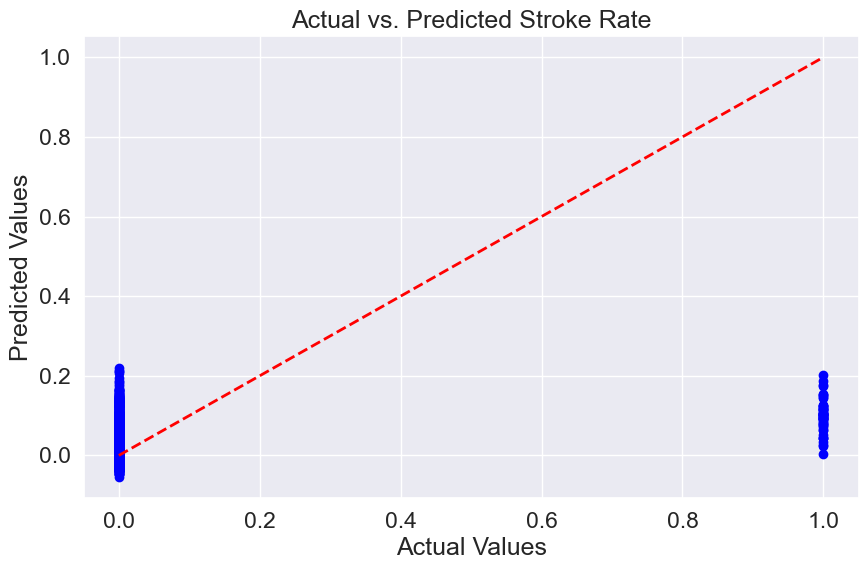

In [45]:
# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Stroke Rate')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

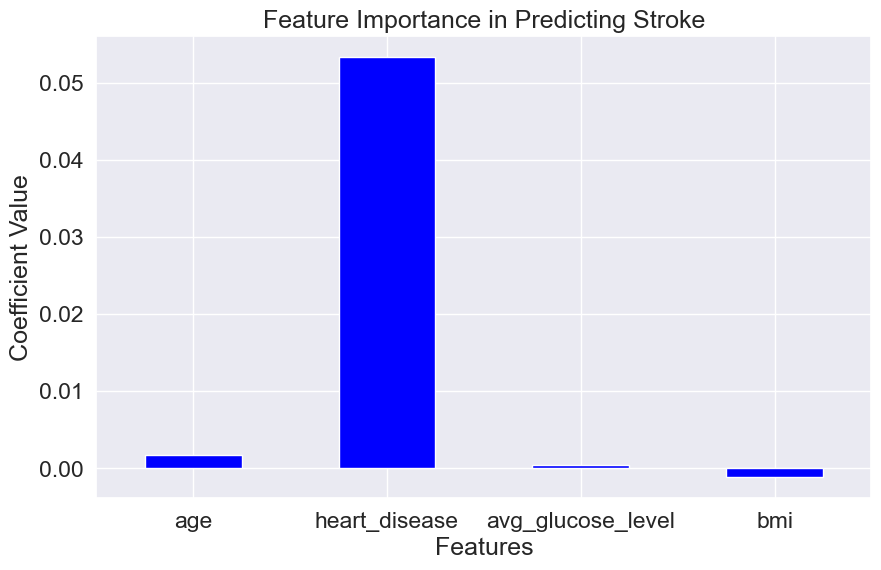

In [46]:
# Plotting Feature Importance (Coefficients) as a bar chart
plt.figure(figsize=(10, 6))
coeff_df.plot(kind='bar', legend=False, color='blue', figsize=(10, 6))
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Predicting Stroke')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [47]:
# Define the feature values for the prediction [age,heart_disease,avg_glucose_level, bmi]
input_data = [[45, 1, 140, 30.66]]

# Use the trained model to predict the stroke possibility
predicted_stroke = model.predict(input_data)

predicted_stroke[0][0]

/Users/viviany/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.10779677870451271

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=['stroke', 'no stroke'])

accuracy, class_report

/Users/viviany/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/viviany/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/viviany/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/viviany/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_

(0.9460285132382892,
 '              precision    recall  f1-score   support\n\n      stroke       0.95      1.00      0.97       929\n   no stroke       0.00      0.00      0.00        53\n\n    accuracy                           0.95       982\n   macro avg       0.47      0.50      0.49       982\nweighted avg       0.89      0.95      0.92       982\n')